In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
import qiskit.quantum_info as qiskit_quantum_info

from src.scripts.iris import X_train, y_train, X_test, y_test, X, dataset
from src.scripts.qmlmodel import rescale_to_angle, make_circuit, predict, loss

[0.02156556 0.21206751 0.67478325 0.09158368]
[0.02156556 0.21206751 0.67478325]
2


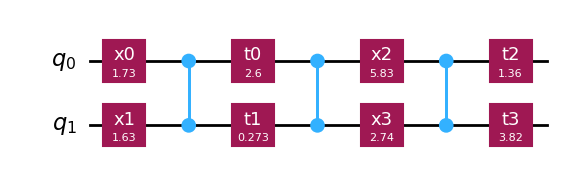

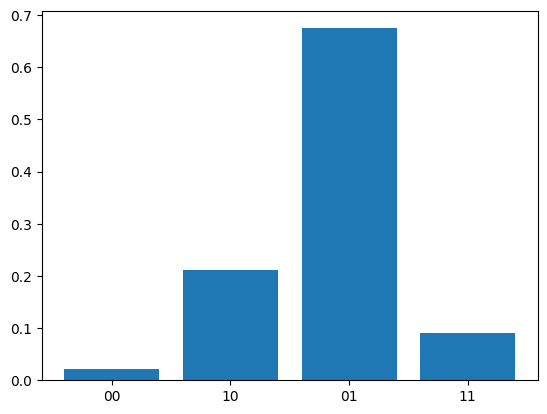

In [2]:

NBQUBITS = 2
x = np.random.rand(4)*np.pi*2
nb_params = 4
t= np.random.rand(nb_params)*np.pi*2
qc = make_circuit(x,t)

stateVec = qiskit_quantum_info.Statevector.from_instruction(qc)
probavec = stateVec.probabilities()
print(probavec)
print(probavec[:-1])
print(probavec[:-1].argmax())

labels=['00','10','01','11']

plt.bar(range(4), probavec)
plt.xticks(range(4),labels=labels)
qc.draw(output='mpl')

In [3]:
# print(np.max(iris.dataset.data, axis=0))
# iris.dataset.feature_names

X_train = rescale_to_angle(X_train, X)
# print(qmlmodel.loss(t,X_train,y_train))

def objective_function(t):
    return loss(t,X_train,y_train, 25)

optimization_path = []
accuracy_path=[]

def objective_function_with_memory(t):
    z = objective_function(t)
    optimization_path.append(z)
    accuracy = accuracy_score(y_train, predict(X_train, t))
    accuracy_path.append(accuracy*100)
    return z

# for seed in range(50):
np.random.seed(42)
t0= np.random.rand(4)*np.pi*2

result = minimize(
    objective_function_with_memory, t0, 
    method='COBYLA', options={'maxiter': 20})

print(result)

y_pred = predict(X_train, result.x)
accuracy = accuracy_score(y_train, y_pred)

print( f"Accuracy on training set: {accuracy*100:.2f}%")


 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.8255113758267573
       x: [ 5.419e+00  4.032e+00  7.738e+00  5.264e+00]
    nfev: 20
   maxcv: 0.0
Accuracy on training set: 91.11%


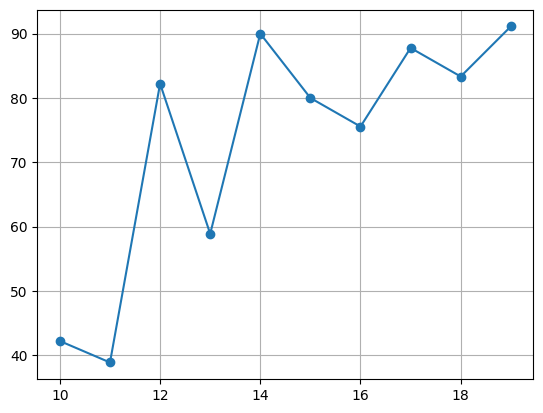

In [4]:
# plt.plot(list(range(len(optimization_path))), optimization_path, marker='o', linestyle='-')
plt.plot(list(range(len(accuracy_path)))[10:40],accuracy_path[10:40], marker='o', linestyle='-')
plt.grid(True)
plt.show()

In [5]:
X_test = rescale_to_angle(X_test, X)
y_test = y_test

y_test_pred = predict(X_test, result.x)


accuracy_test = accuracy_score(y_test,y_test_pred)
print( f"Accuracy on test set: {accuracy_test*100:.2f}%")

Accuracy on test set: 95.00%


[[20  0  0]
 [ 0 20  0]
 [ 0  3 17]]


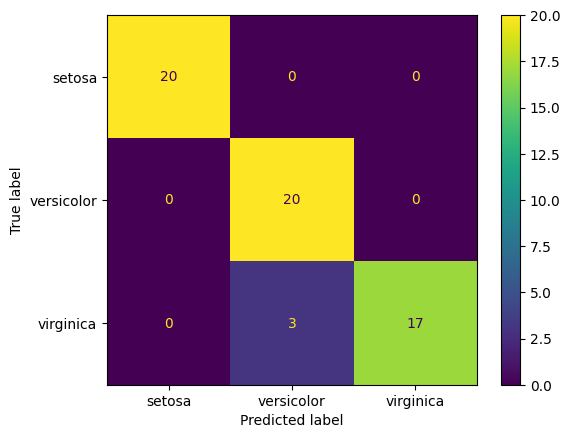

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_test_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dataset.target_names)

cm_display.plot()


plt.show()